In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#df1 = pd.read_csv("./../../data/dev101_prepared.csv")
#df2 = pd.read_csv("./../../data/dev102_prepared.csv")
df_all = pd.read_csv("data/devAll2_prepared.csv")

In [69]:
#df_all = pd.concat([df1, df2], ignore_index=True)
df_all.describe()

,devID,soil,rain,temp,humi,geo,lat,lng
count,301191.000000,301191.000000,301191.000000,301191.000000,301191.000000,301191.000000,301191.000000,301191.000000
mean,101.503282,48.952394,0.205600,29.871124,75.252266,8.128838,8.637978,99.898949
std,0.499990,10.397376,1.761622,3.193456,8.565651,6.716052,0.000038,0.001335
min,101.000000,21.100000,0.000000,24.238958,43.418247,0.000000,8.637330,99.166664
25%,101.000000,44.200001,0.000000,27.368584,69.429153,3.009754,8.637945,99.898926
50%,102.000000,50.400002,0.000000,28.508812,79.240715,4.383256,8.637974,99.898949
75%,102.000000,57.799999,0.000000,32.749290,81.176704,13.366670,8.638014,99.898972
max,102.000000,66.599998,41.630600,38.984512,88.510567,32.062466,8.638361,99.900078


In [70]:
#feature_cols = [
#    'soil', 'rain', 'temp', 'humi', 'geo',
#    'rain_1h_sum', 'rain_3h_sum', 'rain_6h_sum', 'rain_12h_sum', 'rain_1d_sum', 'rain_7d_sum',
#    'soil_1h_mean', 'soil_3h_mean', 'soil_6h_mean', 'soil_12h_mean', 'soil_1d_mean',
#    'geo_1h_mean', 'geo_3h_mean', 'geo_6h_mean', 'geo_12h_mean', 'geo_1d_mean',
#    'soil_diff', 'geo_diff', 'soil_1h_std', 'geo_1h_std'
#]

feature_cols = [
    'soil', 'rain', 'temp', 'humi', 'geo',
]

#feature_cols = [
#    'soil', 'rain', 'temp', 'humi', 'geo',
#    'rain_1h_sum', 'rain_3h_sum', 'rain_6h_sum', 'rain_12h_sum',
#    'soil_1h_mean', 'soil_3h_mean', 'soil_6h_mean', 'soil_12h_mean',
#    'geo_1h_mean', 'geo_3h_mean', 'geo_6h_mean', 'geo_12h_mean',
#]

In [71]:
missing = [col for col in feature_cols if col not in df_all.columns]
if missing:
    raise ValueError(f"ขาดคอลัมน์ในข้อมูลทั้งหมด: {missing}")

In [72]:
df_all

,timestamp,devID,soil,rain,temp,humi,geo,lat,lng
0,2025-05-02 11:42:00.384119,102.0,22.200001,0.0,34.549099,61.175941,3.323395,8.637964,99.898933
1,2025-05-02 11:42:06.635276,101.0,28.799999,0.0,34.290073,62.429081,14.532875,8.637999,99.899010
2,2025-05-02 11:42:11.034615,102.0,22.200001,0.0,34.506374,61.542152,14.766250,8.637963,99.898933
3,2025-05-02 11:42:18.056572,101.0,28.799999,0.0,34.266041,64.082787,14.673310,8.637998,99.899010
4,2025-05-02 11:42:21.675224,102.0,22.200001,0.0,34.485012,61.767223,3.242806,8.637963,99.898933
...,...,...,...,...,...,...,...,...,...
301186,2025-06-29 20:25:27.980,101.0,27.900000,0.0,29.101625,81.113754,2.490953,8.638010,99.898972
301187,2025-06-29 20:25:48.980,102.0,25.600000,0.0,29.908064,77.426796,3.856516,8.637931,99.898941
301188,2025-06-29 20:26:01.100,102.0,25.600000,0.0,29.349968,80.005569,2.614293,8.637931,99.898949
301189,2025-06-29 20:26:02.150,101.0,27.900000,0.0,29.050890,81.302589,8.617684,8.638011,99.898972


In [73]:
df_train, df_temp = train_test_split(df_all, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.35, random_state=42)

print(f"Train: {len(df_train)}, Validation: {len(df_val)}, Test: {len(df_test)}")

X_train = df_train[feature_cols].values
X_val = df_val[feature_cols].values
X_test = df_test[feature_cols].values

Train: 240952, Validation: 39155, Test: 21084


In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#X_train_scaled = X_train
#X_val_scaled = X_val
#X_test_scaled = X_test

In [75]:
iso_model = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
iso_model.fit(X_train_scaled)

IsolationForest(contamination=0.03, random_state=42)

In [76]:
df_train['anomaly_score'] = iso_model.decision_function(X_train_scaled)
df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)
df_test['anomaly_score'] = iso_model.decision_function(X_test_scaled)

In [77]:
#crit_thresh = np.percentile(df_train['anomaly_score'], 1)
#warn_thresh = np.percentile(df_train['anomaly_score'], 10)

crit_thresh = -0.11
warn_thresh = 0.00

def classify_risk(score):
    if score < crit_thresh:
        return "Critical"
    elif score < warn_thresh:
        return "Warning"
    else:
        return "Normal"

for df in [df_train, df_val, df_test]:
    df['risk_level'] = df['anomaly_score'].apply(classify_risk)

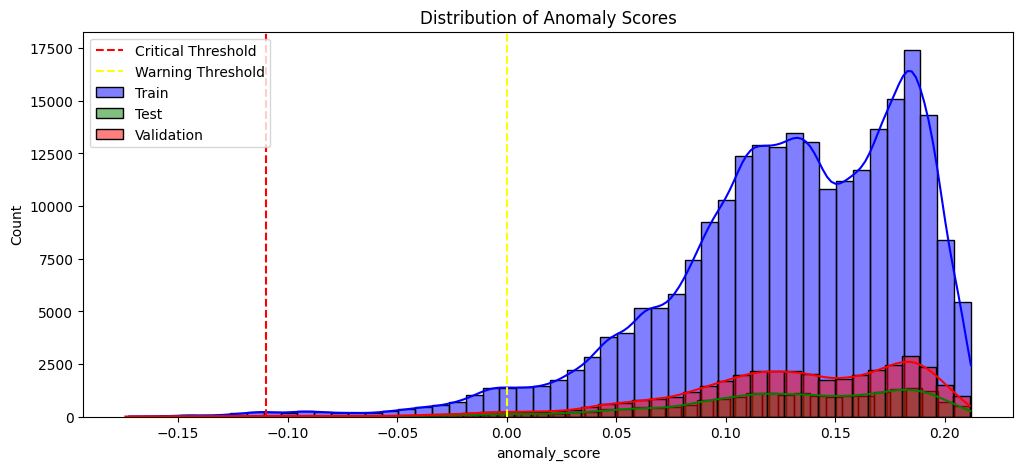

In [78]:

plt.figure(figsize=(12,5))
sns.histplot(df_train['anomaly_score'], bins=50, kde=True, color='blue', label='Train')
sns.histplot(df_test['anomaly_score'], bins=50, kde=True, color='green', label='Test')
sns.histplot(df_val['anomaly_score'], bins=50, kde=True, color='red', label='Validation')
plt.axvline(crit_thresh, color='red', linestyle='--', label='Critical Threshold')
plt.axvline(warn_thresh, color='yellow', linestyle='--', label='Warning Threshold')
plt.legend()
plt.title('Distribution of Anomaly Scores')
plt.show()


In [79]:
print(df_train['risk_level'].value_counts(normalize=True))
print(df_test['risk_level'].value_counts(normalize=True))
print(df_val['risk_level'].value_counts(normalize=True))

risk_level
Normal      0.969998
Warning     0.027449
Critical    0.002552
Name: proportion, dtype: float64
risk_level
Normal      0.970641
Warning     0.027177
Critical    0.002182
Name: proportion, dtype: float64
risk_level
Normal      0.970195
Warning     0.026995
Critical    0.002809
Name: proportion, dtype: float64


In [80]:


df_train.describe()

,devID,soil,rain,temp,humi,geo,lat,lng,anomaly_score
count,240952.000000,240952.000000,240952.000000,240952.000000,240952.000000,240952.000000,240952.000000,240952.000000,240952.000000
mean,101.503266,48.950384,0.206364,29.874764,75.240658,8.129385,8.637978,99.898948,0.128652
std,0.499990,10.394604,1.760113,3.196122,8.572858,6.712801,0.000038,0.001493,0.055859
min,101.000000,21.100000,0.000000,24.238958,43.418247,0.000000,8.637330,99.166664,-0.172448
25%,101.000000,44.200001,0.000000,27.365913,69.381470,3.011344,8.637945,99.898926,0.098356
50%,102.000000,50.400002,0.000000,28.516823,79.240715,4.390074,8.637974,99.898949,0.135462
75%,102.000000,57.799999,0.000000,32.765320,81.174797,13.362694,8.638014,99.898972,0.173785
max,102.000000,66.599998,41.630600,38.984512,88.510567,32.062466,8.638361,99.900078,0.212020


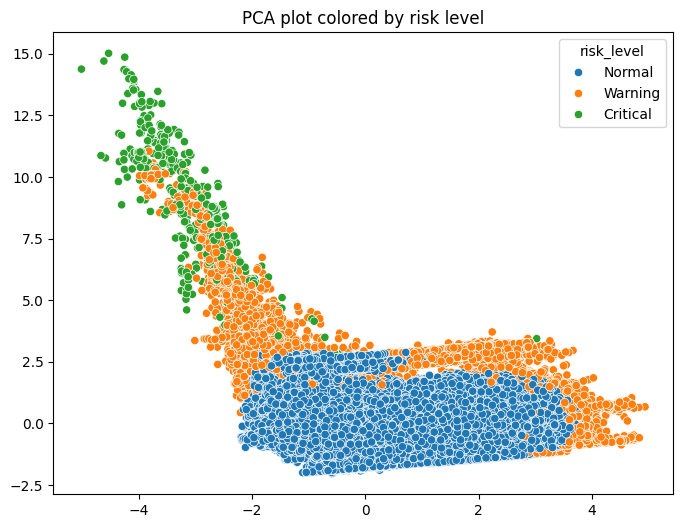

In [81]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_train['risk_level'])
plt.title('PCA plot colored by risk level')
plt.show()


In [82]:
# ดูว่าแต่ละ feature มีน้ำหนักกับแต่ละ principal component เท่าไหร่ x=PC1 y=PC2
pca_df = pd.DataFrame(pca.components_, columns=feature_cols, index=["PC1", "PC2"])
print(pca_df.T.sort_values("PC1", ascending=False))  # เรียงตามผลต่อแกน X


           PC1       PC2
temp  0.687312  0.108892
geo  -0.007481  0.687057
rain -0.136301  0.591021
soil -0.229081  0.381617
humi -0.675641 -0.145455


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\1129453054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all_labeled, x='risk_level', order=['Normal', 'Warning', 'Critical'], palette='Set2')


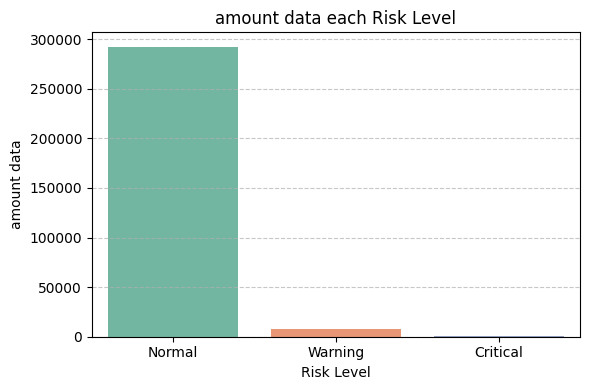

In [83]:
df_all_labeled = pd.concat([df_train, df_val, df_test], ignore_index=True)

plt.figure(figsize=(6, 4))
sns.countplot(data=df_all_labeled, x='risk_level', order=['Normal', 'Warning', 'Critical'], palette='Set2')

plt.title('amount data each Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('amount data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
df_all_labeled['risk_level'].value_counts()

risk_level
Normal      292176
Warning       8244
Critical       771
Name: count, dtype: int64

In [85]:
df_all_labeled['risk_level'].value_counts(normalize=True) * 100  # คูณ 100 เพื่อเป็น %


risk_level
Normal      97.006883
Warning      2.737134
Critical     0.255984
Name: proportion, dtype: float64

In [86]:
df_all_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301191 entries, 0 to 301190
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      301191 non-null  object 
 1   devID          301191 non-null  float64
 2   soil           301191 non-null  float64
 3   rain           301191 non-null  float64
 4   temp           301191 non-null  float64
 5   humi           301191 non-null  float64
 6   geo            301191 non-null  float64
 7   lat            301191 non-null  float64
 8   lng            301191 non-null  float64
 9   anomaly_score  301191 non-null  float64
 10  risk_level     301191 non-null  object 
dtypes: float64(9), object(2)
memory usage: 25.3+ MB


C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\2630523206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all_labeled, x='risk_level', y=feature, order=['Normal', 'Warning', 'Critical'], palette='Set2')


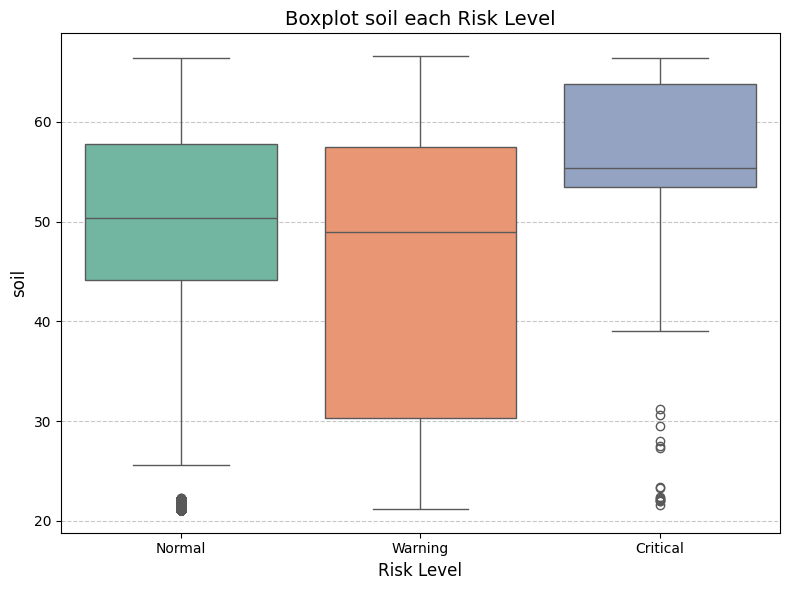

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\2630523206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all_labeled, x='risk_level', y=feature, order=['Normal', 'Warning', 'Critical'], palette='Set2')


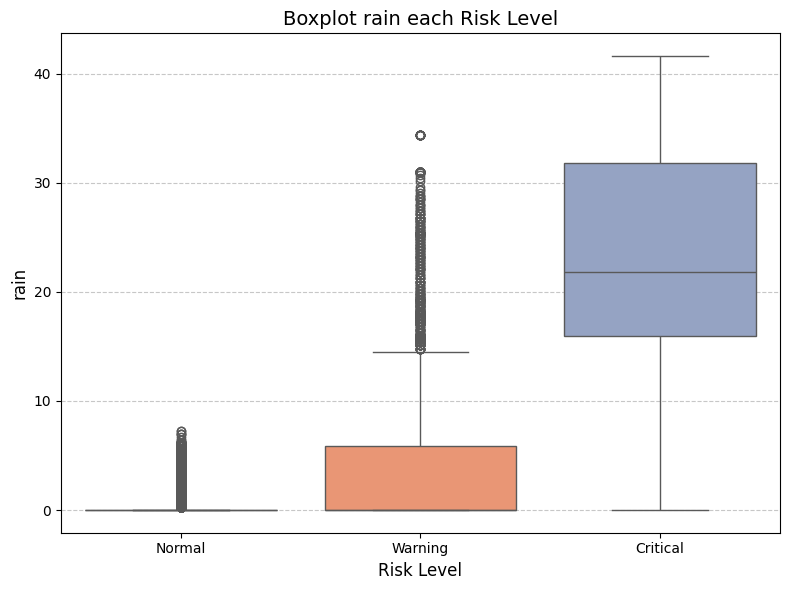

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\2630523206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all_labeled, x='risk_level', y=feature, order=['Normal', 'Warning', 'Critical'], palette='Set2')


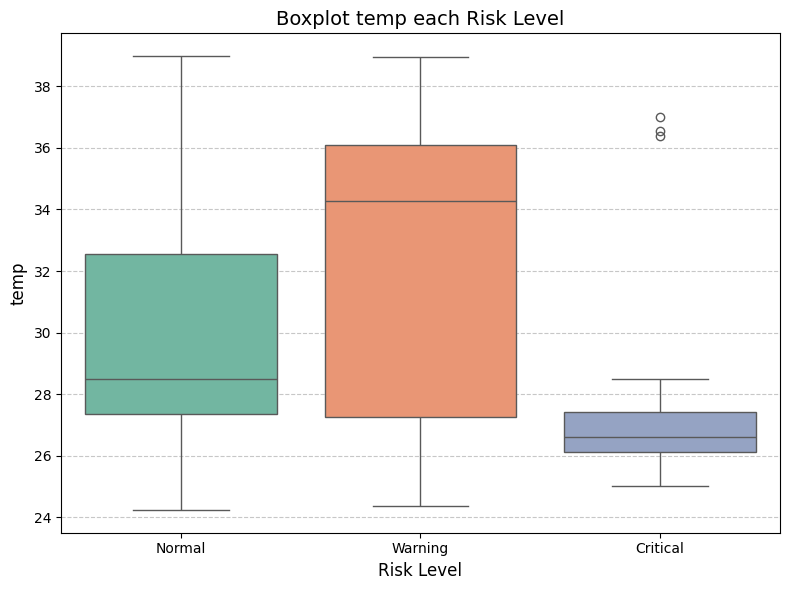

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\2630523206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all_labeled, x='risk_level', y=feature, order=['Normal', 'Warning', 'Critical'], palette='Set2')


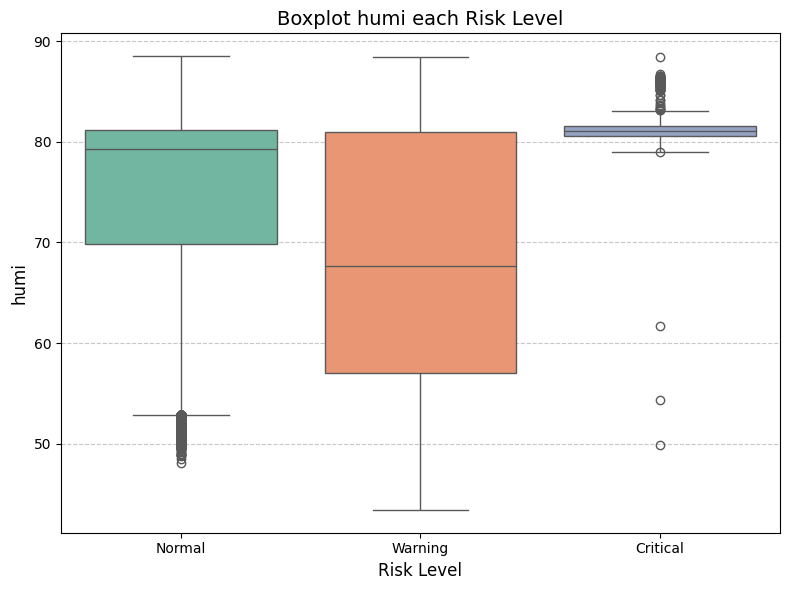

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\2630523206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all_labeled, x='risk_level', y=feature, order=['Normal', 'Warning', 'Critical'], palette='Set2')


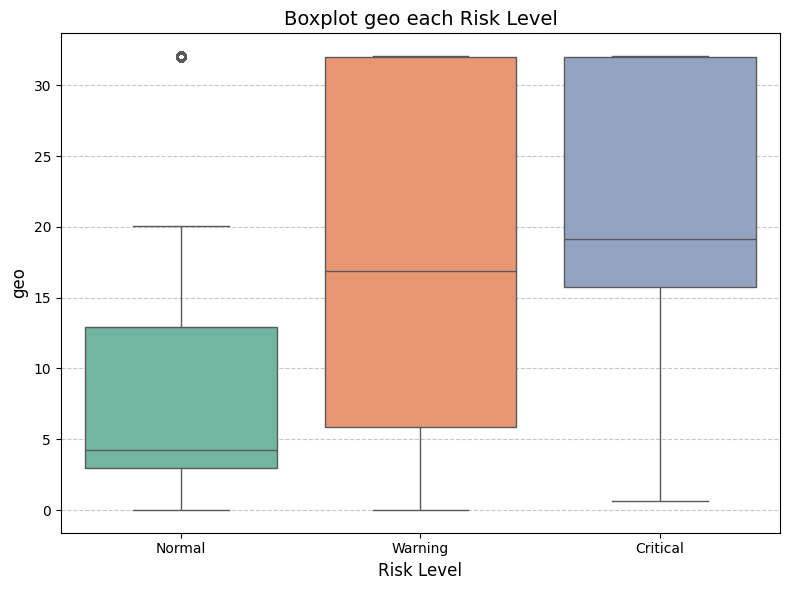

Create Box Plot for every Feature successfully!


In [89]:
for feature in feature_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_all_labeled, x='risk_level', y=feature, order=['Normal', 'Warning', 'Critical'], palette='Set2')


    plt.title(f'Boxplot {feature} each Risk Level', fontsize=14)
    plt.xlabel('Risk Level', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

print("Create Box Plot for every Feature successfully!")

C:\Users\ahmad\AppData\Local\Temp\ipykernel_17336\510649456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all_labeled, x='risk_level', y='anomaly_score', order=['Normal', 'Warning', 'Critical'], palette='Set2')


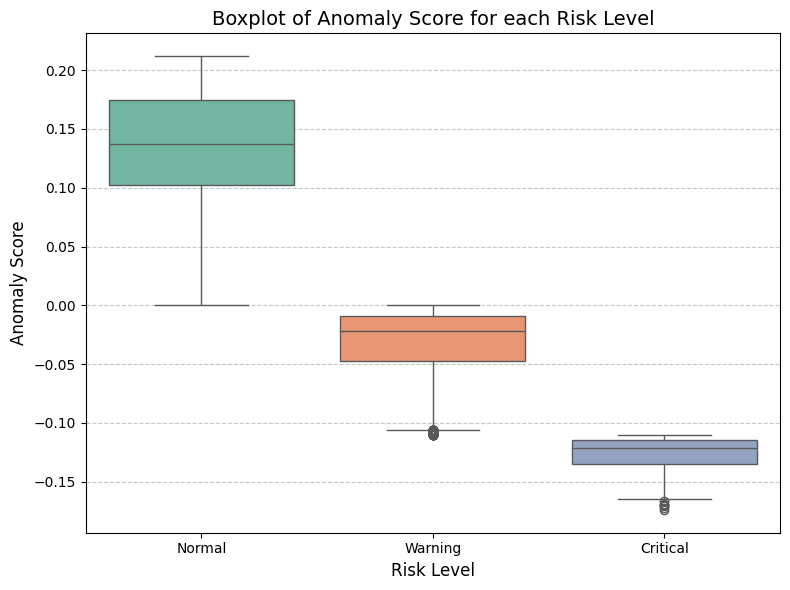

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_all_labeled, x='risk_level', y='anomaly_score', order=['Normal', 'Warning', 'Critical'], palette='Set2')
plt.title('Boxplot of Anomaly Score for each Risk Level', fontsize=14)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Anomaly Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [91]:
from joblib import dump
dump(scaler, 'model/iso_scaler.joblib')
dump(iso_model, 'model/iso_model.joblib')

['model/iso_model.joblib']

In [92]:
"""

from joblib import load
scaler = load('scaler.joblib')
model = load('iso_model.joblib')

x_new = scaler.transform([[soil, rain, temp, humi, geo]])
score = model.decision_function(x_new)

if score < -0.2:
    risk = "Critical"
elif score < 0.0:
    risk = "Warning"
else:
    risk = "Normal"
    
    """

'\n\nfrom joblib import load\nscaler = load(\'scaler.joblib\')\nmodel = load(\'iso_model.joblib\')\n\nx_new = scaler.transform([[soil, rain, temp, humi, geo]])\nscore = model.decision_function(x_new)\n\nif score < -0.2:\n    risk = "Critical"\nelif score < 0.0:\n    risk = "Warning"\nelse:\n    risk = "Normal"\n    \n    '

In [93]:
df_train, df_temp = train_test_split(df_all, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.35, random_state=42)

print(f"Train: {len(df_train)}, Validation: {len(df_val)}, Test: {len(df_test)}")

Train: 240952, Validation: 39155, Test: 21084
